# Dataset Generation

In [1]:
import random as rd
import math
import pandas as pd
import networkx as nx
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx
import decimal

In [2]:
#CONSTANTES GLOBALES
K = -4
GAMMA = 2.1
BETA = 1/(GAMMA-1)
n = 10000
m = 3

## Popularity Similarity algorithm

In [3]:
##############################################################################################
# 1. Defining Probability to connect 
##############################################################################################

def probability_to_connect(G, t, s, T):
    rs = G.nodes[s]['r'] 
    rt = G.nodes[t]['r']
    thetas = G.nodes[s]['theta']
    thetat = G.nodes[t]['theta']
    rst = BETA * rs + (1 - BETA) * rt

    if T == 0:
        Rt = rt - math.log((2 / (math.pi * m * (1 - BETA))) * (1 - math.exp(-1 * (1 - BETA) * rt)))
        Pst = (2 / math.pi) * math.exp(-1 * (rst + rt - Rt))
    else:
        sinT = math.sin(T)
        denom = (sinT * math.pi * m * (1 - BETA))
        Rt = rt - math.log((2 * T / denom) * (1 - math.exp(-(1 - BETA) * rt)))
        abs_diff = math.pi - abs(math.pi - abs(thetat - thetas))
        exponent = math.exp(rst + rt - Rt)
        Pst = 1 / (1 + (exponent * (abs_diff / 2) ** (1 / T)))

    return Pst


def add_m_edges(G, nodo_t, P_normalised, m):
    """
    This function creates the links between the new node and the m nodes according to the normalised probabilities vector.
    
    Params: 
    G: Graph 
    node_t: New node.
    P_normalised: normalised probabilities vector.
    m: number of edges to add.
    
    """
    for _ in range(m):
        r = rd.uniform(0, 1)  # Generar número aleatorio en [0,1]
        sum_i = 0
        i = 0
        
        # Iterar por el vector de probabilidades
        while i < len(P_normalised):
            #Comprobar si la suma de probabilidades hasta i
            if sum_i < r:
                sum_i += P_normalised[i]
            
                if sum_i >= r:
                    node = list(G.nodes())[i]
                    if ((node not in G.adj[nodo_t]) & (node!=nodo_t)):
                        G.add_edge(nodo_t, node)
                        break
            i += 1
    
    return G

###############################################################################################
# 2. Creating graph
###############################################################################################


# def PS(n, T):
#     G = nx.Graph()
# #Mientras que no haya conseguido todos los nodos en el grafo
#     while len(G.nodes())<n:
#         #Crea un nodo nuevo
#         t = len(G.nodes())+1
#         new_node = [(t, {"r": 2*math.log(t), "theta":rd.random()*2*math.pi })]
#         G.add_nodes_from(new_node)
#         #print("###### Adding node:", new_node)

#         #Si estamos en etapas iniciales y el numero de nodos en el grafo es menor que m
#         if len(G.nodes())<=m:
#             #Conectamos todos los nodos 
#             for node in G.nodes():
#                 if node != t:
#                     G.add_edge(t, node)
#         else:
#             n_conected=0
#             #Mientras que el numero de conexiones sea menor que m
#             while n_conected < m:
#     #             # Coge un nodo aleatorio del grafo
#                 s = rd.sample(list(G.nodes()), 1)[0]
#                 # Calula la probabilidad de conectar 


#                 Pst = probability_to_connect(G, t, s, T)
#                 if(s not in G.adj[t])and (rd.random() <= Pst): 
#     #             # Si no se ha conectado con anterioridad y random > probabilidad, incluimos la conexion
#                     G.add_edge(t, s)
#                     n_conected += 1

#     return G     

def PS_optimised(n, T):
    G = nx.Graph()
#Mientras que no haya conseguido todos los nodos en el grafo
    while len(G.nodes())<n:
        #Crea un nodo nuevo
        
        t = len(G.nodes())+1
        
        new_node = [(t, {"r": 2*math.log(t), "theta":rd.random()*2*math.pi })]
        G.add_nodes_from(new_node)
        #print("###### Adding node:", new_node)

        #Si estamos en etapas iniciales y el numero de nodos en el grafo es menor que m
        if len(G.nodes())<=m:
            #Conectamos todos los nodos 
            for node in G.nodes():
                if node != t:
                    G.add_edge(t, node)
        else:
            
            # Generamos el vector de probabilidades para cada nodo existente en el grafo. 
            P = [probability_to_connect(G, t, node, T) for node in G.nodes()]
            P_normalised  = P / np.linalg.norm(P)
            add_m_edges(G, t, P_normalised, m)           
            
    return G   


In [4]:
# Vamos a generar un dataset variando aleatoriamente la temperatura entre (0,1)
from datetime import datetime
datetime.now()

# El número de nodos es de 1000.
# El tamaño de nuestro dataset será de 10.000 elemetos (grafos).

datetime.datetime(2023, 7, 16, 16, 57, 31, 396584)

In [ ]:

for i in range(500, 2000):
    T = round(rd.random(),4)
    G = PS_optimised(500,T)
    print("Saving graph:", i)
    print("T: ", T)
    nx.write_gpickle(G,os.path.join(r"C:\Users\l.sanchezparra\Documents\Personal\TFG\Python code\Dataset\500\Train\X",f"{i}.gpickle"))
    #Guardamos la etiqueta
    with open(os.path.join(r"C:\Users\l.sanchezparra\Documents\Personal\TFG\Python code\Dataset\500\Train\y",f"{i}.txt"), 'w') as f:
        f.write(str(T))


Saving graph: 500
T:  0.7046
Saving graph: 501
T:  0.2157
Saving graph: 502
T:  0.9984
Saving graph: 503
T:  0.6232
Saving graph: 504
T:  0.4891
Saving graph: 505
T:  0.6478
Saving graph: 506
T:  0.7051
Saving graph: 507
T:  0.4002
Saving graph: 508
T:  0.4652
Saving graph: 509
T:  0.149
Saving graph: 510
T:  0.0321
Saving graph: 511
T:  0.4054
Saving graph: 512
T:  0.6732
Saving graph: 513
T:  0.1039
Saving graph: 514
T:  0.8823
Saving graph: 515
T:  0.9748
Saving graph: 516
T:  0.6455
Saving graph: 517
T:  0.4304
Saving graph: 518
T:  0.2458
Saving graph: 519
T:  0.5017
Saving graph: 520
T:  0.2412
Saving graph: 521
T:  0.2183
Saving graph: 522
T:  0.1577
Saving graph: 523
T:  0.7782
Saving graph: 524
T:  0.4877
Saving graph: 525
T:  0.3982
Saving graph: 526
T:  0.1009
Saving graph: 527
T:  0.002
Saving graph: 528
T:  0.6946
Saving graph: 529
T:  0.2025
Saving graph: 530
T:  0.0929
Saving graph: 531
T:  0.2808
Saving graph: 532
T:  0.1238
Saving graph: 533
T:  0.1568
Saving graph: 53

Saving graph: 784
T:  0.9081
Saving graph: 785
T:  0.3545
Saving graph: 786
T:  0.5859
Saving graph: 787
T:  0.1779
Saving graph: 788
T:  0.1595
Saving graph: 789
T:  0.5621
Saving graph: 790
T:  0.6544
Saving graph: 791
T:  0.5824
Saving graph: 792
T:  0.0385
Saving graph: 793
T:  0.6152
Saving graph: 794
T:  0.2711
Saving graph: 795
T:  0.3671
Saving graph: 796
T:  0.3416
Saving graph: 797
T:  0.5549
Saving graph: 798
T:  0.4381
Saving graph: 799
T:  0.6096
Saving graph: 800
T:  0.0065
Saving graph: 801
T:  0.3369
Saving graph: 802
T:  0.1492
Saving graph: 803
T:  0.6437
Saving graph: 804
T:  0.1187
Saving graph: 805
T:  0.8072
Saving graph: 806
T:  0.5767
Saving graph: 807
T:  0.8377
Saving graph: 808
T:  0.1916
Saving graph: 809
T:  0.0499
Saving graph: 810
T:  0.5546
Saving graph: 811
T:  0.7952
Saving graph: 812
T:  0.4607
Saving graph: 813
T:  0.6167
Saving graph: 814
T:  0.4498
Saving graph: 815
T:  0.5638
Saving graph: 816
T:  0.7213
Saving graph: 817
T:  0.2087
Saving graph: 

Saving graph: 1066
T:  0.2431
Saving graph: 1067
T:  0.9848
Saving graph: 1068
T:  0.0679
Saving graph: 1069
T:  0.6756
Saving graph: 1070
T:  0.9817
Saving graph: 1071
T:  0.7519
Saving graph: 1072
T:  0.7038
Saving graph: 1073
T:  0.0157
Saving graph: 1074
T:  0.2615
Saving graph: 1075
T:  0.6871
Saving graph: 1076
T:  0.2157
Saving graph: 1077
T:  0.1812
Saving graph: 1078
T:  0.1119
Saving graph: 1079
T:  0.667
Saving graph: 1080
T:  0.756
Saving graph: 1081
T:  0.9312
Saving graph: 1082
T:  0.9322
Saving graph: 1083
T:  0.3445
Saving graph: 1084
T:  0.8925
Saving graph: 1085
T:  0.1763
Saving graph: 1086
T:  0.2598
Saving graph: 1087
T:  0.2367
Saving graph: 1088
T:  0.2947
Saving graph: 1089
T:  0.0521
Saving graph: 1090
T:  0.2315
Saving graph: 1091
T:  0.684
Saving graph: 1092
T:  0.3109
Saving graph: 1093
T:  0.5265
Saving graph: 1094
T:  0.9432
Saving graph: 1095
T:  0.3168
Saving graph: 1096
T:  0.5439
Saving graph: 1097
T:  0.7442
Saving graph: 1098
T:  0.4386
Saving graph:

Saving graph: 1341
T:  0.8652
Saving graph: 1342
T:  0.2759
Saving graph: 1343
T:  0.1654
Saving graph: 1344
T:  0.3818
Saving graph: 1345
T:  0.9847
Saving graph: 1346
T:  0.9141
Saving graph: 1347
T:  0.9919
Saving graph: 1348
T:  0.3601
Saving graph: 1349
T:  0.3621
Saving graph: 1350
T:  0.0871
Saving graph: 1351
T:  0.3169
Saving graph: 1352
T:  0.0663
Saving graph: 1353
T:  0.0721
Saving graph: 1354
T:  0.2506
Saving graph: 1355
T:  0.1865
Saving graph: 1356
T:  0.6357
Saving graph: 1357
T:  0.6672
Saving graph: 1358
T:  0.0835
Saving graph: 1359
T:  0.3904
Saving graph: 1360
T:  0.0925
Saving graph: 1361
T:  0.4842
Saving graph: 1362
T:  0.8492
Saving graph: 1363
T:  0.5677
Saving graph: 1364
T:  0.5567
Saving graph: 1365
T:  0.7637
Saving graph: 1366
T:  0.5574
Saving graph: 1367
T:  0.2903
Saving graph: 1368
T:  0.3473
Saving graph: 1369
T:  0.4258
Saving graph: 1370
T:  0.5826
Saving graph: 1371
T:  0.0521
Saving graph: 1372
T:  0.4021
Saving graph: 1373
T:  0.3388
Saving gra

Saving graph: 1615
T:  0.8174
Saving graph: 1616
T:  0.8554
Saving graph: 1617
T:  0.8188
Saving graph: 1618
T:  0.1921
Saving graph: 1619
T:  0.8687
Saving graph: 1620
T:  0.0161
Saving graph: 1621
T:  0.6695
Saving graph: 1622
T:  0.5034
Saving graph: 1623
T:  0.851
Saving graph: 1624
T:  0.5836
Saving graph: 1625
T:  0.4303
Saving graph: 1626
T:  0.7273
Saving graph: 1627
T:  0.7898
Saving graph: 1628
T:  0.4952
Saving graph: 1629
T:  0.354
Saving graph: 1630
T:  0.8513
Saving graph: 1631
T:  0.8599
Saving graph: 1632
T:  0.3486
Saving graph: 1633
T:  0.8317
Saving graph: 1634
T:  0.3617
Saving graph: 1635
T:  0.3975
Saving graph: 1636
T:  0.0682
Saving graph: 1637
T:  0.3476
Saving graph: 1638
T:  0.5275
Saving graph: 1639
T:  0.6251
Saving graph: 1640
T:  0.0207
Saving graph: 1641
T:  0.9293
Saving graph: 1642
T:  0.3908
Saving graph: 1643
T:  0.9644
Saving graph: 1644
T:  0.0156
Saving graph: 1645
T:  0.2611
Saving graph: 1646
T:  0.3841
Saving graph: 1647
T:  0.4666
Saving graph

In [69]:
T = round(rd.random(),4)
H = PS_optimised(300,T)
print("T: ", T)

T:  0.9268


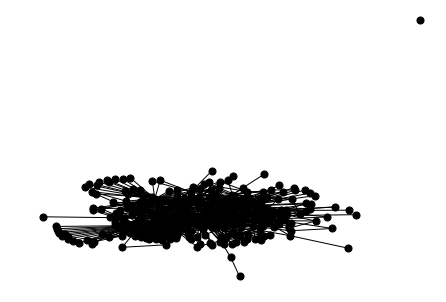

In [70]:
nx.draw(H, with_labels=True, node_color='black', node_size=50, font_size=2, font_color='black')

# Muestra el diagrama
plt.savefig("high_entropy.png")
plt.show()


In [52]:
T = round(rd.random(),4)
G = PS_optimised(300,T)
print("T: ", T)

T:  0.0697


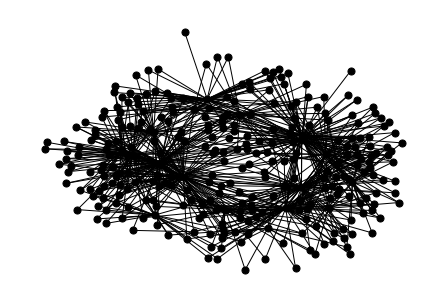

In [54]:
nx.draw(G, with_labels=True, node_color='black', node_size=50, font_size=2, font_color='black')

# Muestra el diagrama
plt.savefig("low_entropy.png")
plt.show()

In [18]:
eccentricities = nx.eccentricity(G)

# Obtener el diámetro (la máxima distancia)
diameter = max(eccentricities.values())
diameter

5

In [11]:
for i in range(34, 500):
    T = round(rd.random(),4)
    G = PS_optimised(500,T)
    print("Saving graph:", i)
    print("T: ", T)
    nx.write_gpickle(G,os.path.join(r"C:\Users\l.sanchezparra\Documents\Personal\TFG\Python code\Dataset\500\Validation\X",f"{i}.gpickle"))
    #Guardamos la etiqueta
    with open(os.path.join(r"C:\Users\l.sanchezparra\Documents\Personal\TFG\Python code\Dataset\500\Validation\y",f"{i}.txt"), 'w') as f:
        f.write(str(T))


Saving graph: 34
T:  0.0537
Saving graph: 35
T:  0.4216
Saving graph: 36
T:  0.584
Saving graph: 37
T:  0.7394
Saving graph: 38
T:  0.4426
Saving graph: 39
T:  0.1428
Saving graph: 40
T:  0.3618
Saving graph: 41
T:  0.3836
Saving graph: 42
T:  0.2836
Saving graph: 43
T:  0.7833
Saving graph: 44
T:  0.8688
Saving graph: 45
T:  0.214
Saving graph: 46
T:  0.189
Saving graph: 47
T:  0.6593
Saving graph: 48
T:  0.7394
Saving graph: 49
T:  0.1865
Saving graph: 50
T:  0.4122
Saving graph: 51
T:  0.6322
Saving graph: 52
T:  0.0741
Saving graph: 53
T:  0.3688
Saving graph: 54
T:  0.4445
Saving graph: 55
T:  0.3233
Saving graph: 56
T:  0.3544
Saving graph: 57
T:  0.3557
Saving graph: 58
T:  0.35
Saving graph: 59
T:  0.7295
Saving graph: 60
T:  0.0935
Saving graph: 61
T:  0.4138
Saving graph: 62
T:  0.3015
Saving graph: 63
T:  0.6926
Saving graph: 64
T:  0.9015
Saving graph: 65
T:  0.9552
Saving graph: 66
T:  0.711
Saving graph: 67
T:  0.5628
Saving graph: 68
T:  0.6208
Saving graph: 69
T:  0.120

Saving graph: 320
T:  0.6919
Saving graph: 321
T:  0.6286
Saving graph: 322
T:  0.3609
Saving graph: 323
T:  0.6312
Saving graph: 324
T:  0.1148
Saving graph: 325
T:  0.1892
Saving graph: 326
T:  0.3665
Saving graph: 327
T:  0.3898
Saving graph: 328
T:  0.3757
Saving graph: 329
T:  0.6007
Saving graph: 330
T:  0.0773
Saving graph: 331
T:  0.4561
Saving graph: 332
T:  0.6851
Saving graph: 333
T:  0.0085
Saving graph: 334
T:  0.2296
Saving graph: 335
T:  0.9087
Saving graph: 336
T:  0.0993
Saving graph: 337
T:  0.3072
Saving graph: 338
T:  0.8198
Saving graph: 339
T:  0.4881
Saving graph: 340
T:  0.0852
Saving graph: 341
T:  0.186
Saving graph: 342
T:  0.07
Saving graph: 343
T:  0.3404
Saving graph: 344
T:  0.4601
Saving graph: 345
T:  0.0099
Saving graph: 346
T:  0.0982
Saving graph: 347
T:  0.8856
Saving graph: 348
T:  0.1187
Saving graph: 349
T:  0.2038
Saving graph: 350
T:  0.6834
Saving graph: 351
T:  0.1106
Saving graph: 352
T:  0.8398
Saving graph: 353
T:  0.702
Saving graph: 354
